In [2]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [3]:
print(f"Shape of the dataset: {df.shape}")
print(f"Dataset Structure: \n{df.info()}")
print(f"Summary statistics: \n{df.describe()}")


Shape of the dataset: (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Dataset Structure: 
None
Summary statistics: 
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.00000

In [4]:

print(f"Missing values: \n{df.isnull().sum()}")


Missing values: 
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


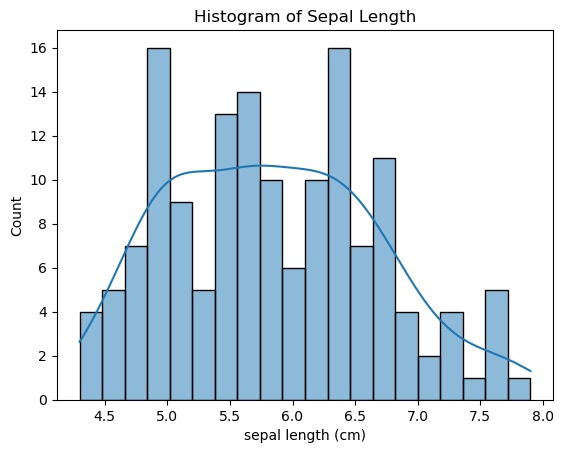

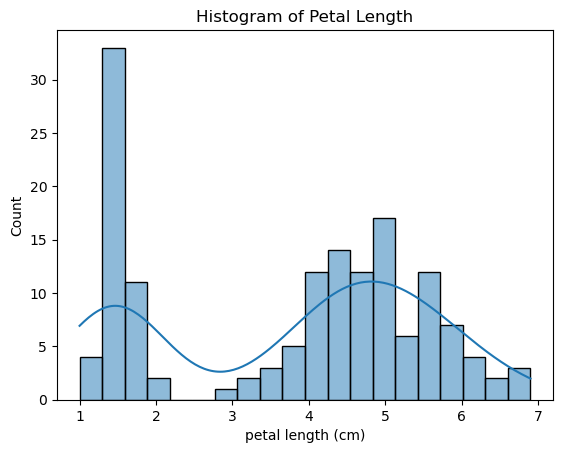

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram for Sepal Length
sns.histplot(df['sepal length (cm)'], kde=True, bins=20)
plt.title('Histogram of Sepal Length')
plt.show()

# Plot histogram for Petal Length
sns.histplot(df['petal length (cm)'], kde=True, bins=20)
plt.title('Histogram of Petal Length')
plt.show()


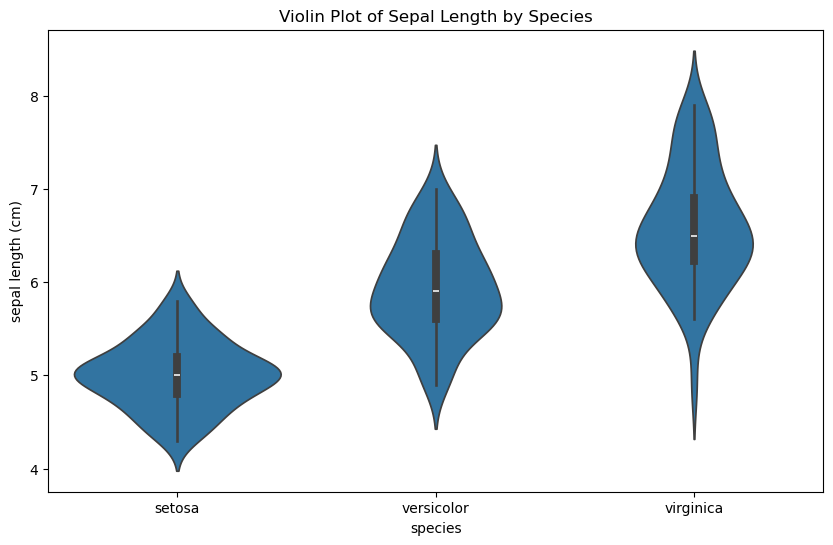

In [6]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='sepal length (cm)', data=df)
plt.title('Violin Plot of Sepal Length by Species')
plt.show()


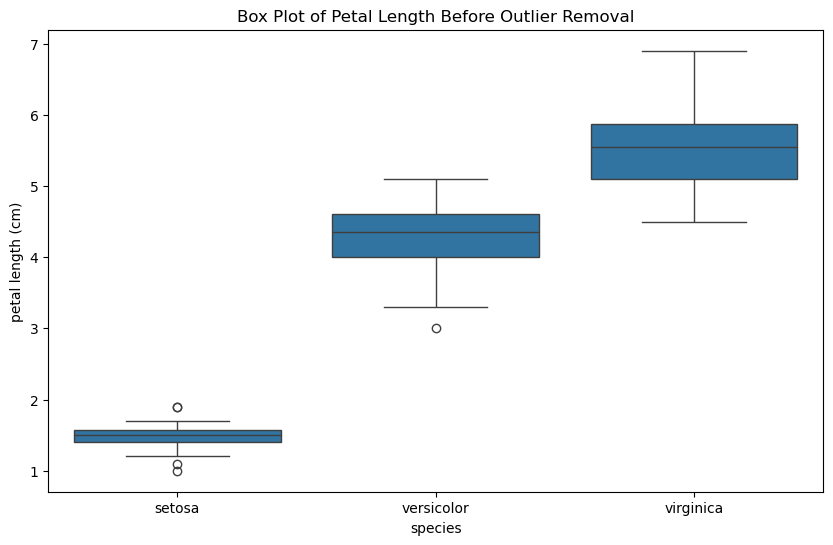

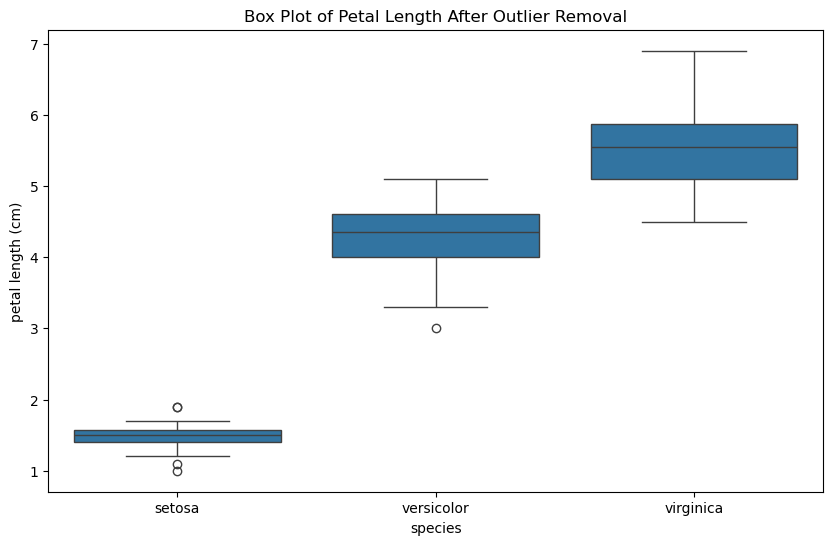

In [7]:

Q1 = df['petal length (cm)'].quantile(0.25)
Q3 = df['petal length (cm)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title('Box Plot of Petal Length Before Outlier Removal')
plt.show()

df_filtered = df[(df['petal length (cm)'] >= lower_bound) & (df['petal length (cm)'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal length (cm)', data=df_filtered) k 
plt.title('Box Plot of Petal Length After Outlier Removal')
plt.show()


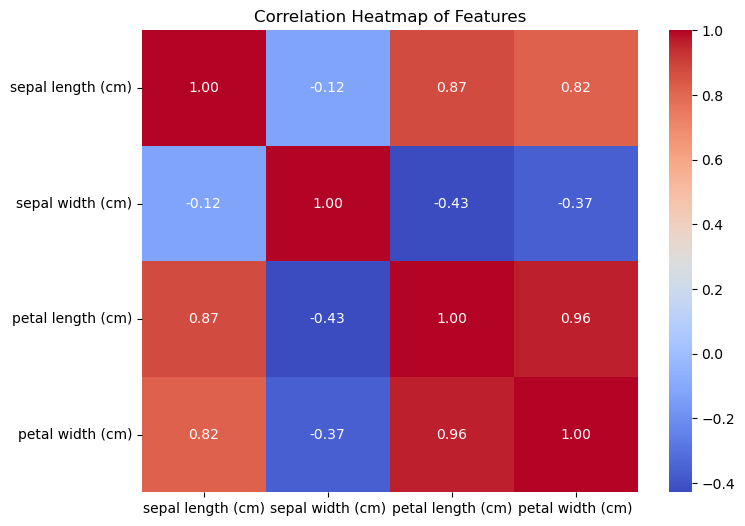

In [8]:
correlation_matrix = df.iloc[:, :-1].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = df.copy()
df_scaled.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

print(df_scaled.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
